# AVACADO AVERAGE PRICE PREDICTIONS

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


### PREDICTIONS: Our target is to predict the average price of Avacados.

#### WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) DATA PREPROCESSING

4) EXPLORATORY DATA ANALYSIS

5) SPLITING DATA AND APPLYING train_test_split

6) FINDING BEST RANDOM STATE

7) PREDCTING AVERAGE PRICE OF AVACADO USING DIFFERENT ALGORITHMS

8) GRID SEARCH CV

9) TUNNING WITH BEST PARAMETERS

10) SAVING OUR MODEL

11) CONCLUSION

In [1]:
# impoting libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df = pd.read_csv('Avacado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### we can clearly see that there are null values present in our data.

First, we see how many null values are present in our Dataset, than we will treat these null values.

In [4]:
# first 5 rows of dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
# last 5 rows of dataset
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(16468, 14)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
df.columns.size

14

In [9]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

#### Unamed: 0: This just a useless index feature, we will remove this later.

#### Date: on which day Avacado sold.

#### Average Price: Mean price.
        
#### Total Volume : This describe the total sales volume of avocados.
    
#### 4046 : Total sales volume of Small Hass Avocado.
    
#### 4225 : Total sales volume of Large Hass Avocado.
    
#### 4770 : Total sales volume of Extra Large Hass Avocado.
    
#### Total Bags: Total number of Bags sold.
    
#### Small Bags: Total number of Small Bags sold.
    
#### Large Bags: Total number of Large Bags sold.
    
#### XLarge Bags: Total number of XLarge Bags sold.
    
#### type: whether organic or conventional Avacados.    
 
#### year: In which year Avacado sold.

#### region: In which region Avacado sold.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


The variables of the data are of following category:

#### Categorical: "region","type"
    
#### Date: "Date"
    
#### Numerical:"Unamed: 0","Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags","Large Bags","XLarge Bags","Year"
    
#### Target:"AveragePrice"

In [11]:
# checking Unique Values

df.apply(lambda x: len(x.unique()))

Unnamed: 0        53
Date             105
AveragePrice     114
Total Volume    1518
4046            1518
4225            1518
4770            1517
Total Bags      1518
Small Bags      1518
Large Bags      1378
XLarge Bags      712
type               2
year               3
region            52
dtype: int64

# DESCRIBING DATASET

The measures of central tendency and distribution are some measures to define the data set. 

The measures used to define the central tendency are mean, median and mode. 

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

count: It indicates the number of records for each attribute that corresponds to the number of Avacados.

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


As we can see, the feature 'type', 'region' is missing.

This is because the values of "type", "region" are categorical and categorical values do not have means and percentiles.

Note: ML models find it difficult to work with values of different types (such as both categorical and numeric, as in this dataset) at the same time. This is why we will convert "region", "type" by LabelEncoding later.

# Preprocessing the dataset

In [13]:
# check for null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

##### We can see that there are 14951 empty rows.

we will drop these rows for better analysis of our data.

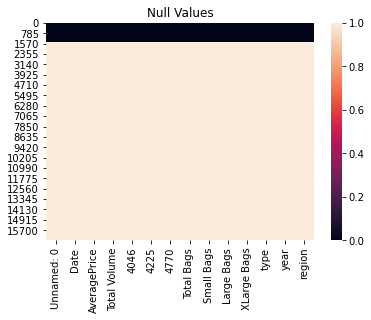

In [14]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [15]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print()

37.0    40
38.0    40
36.0    39
39.0    38
40.0    38
35.0    38
33.0    38
41.0    37
34.0    37
43.0    36
42.0    36
44.0    35
32.0    34
45.0    34
29.0    33
46.0    33
31.0    33
30.0    32
28.0    31
47.0    30
4.0     28
1.0     28
27.0    28
2.0     28
5.0     28
3.0     28
6.0     28
0.0     27
48.0    27
7.0     27
8.0     26
26.0    26
49.0    26
25.0    26
20.0    25
18.0    24
12.0    24
10.0    24
21.0    24
50.0    24
19.0    24
11.0    24
9.0     24
24.0    24
17.0    24
22.0    23
51.0    23
14.0    23
23.0    23
13.0    23
16.0    23
15.0    21
Name: Unnamed: 0, dtype: int64

12-04-2015    34
05-04-2015    34
19-04-2015    33
22-03-2015    32
10-05-2015    32
              ..
19-06-2016     3
14-08-2016     3
24-07-2016     3
04-09-2016     3
11-09-2016     2
Name: Date, Length: 104, dtype: int64

1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
1.49     1
0.49     1
1.53     1
1.54     1
1.61     1
Name: AveragePrice, Length: 113, dtype: int64

84

### TREATING NULL VALUES

In [16]:
# droping irrelevant columns.

df = df.drop(columns=['Unnamed: 0'])

In [17]:
# droping empty rows

df.dropna(axis=0,subset=None,inplace=True)

In [18]:
# checking cloumns after removing irrelevant data.

df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [20]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [21]:
#now we will check whether there is null values still present or not

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

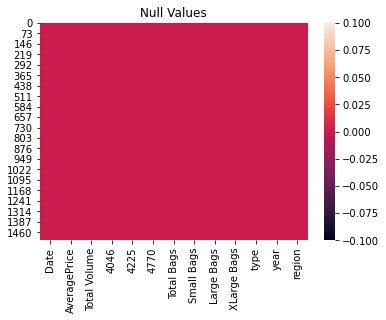

In [22]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

#### we can clearly visulaize that there is no null values present in our dataset.

## Spliting the "date" column into "day", "year", "month"

In [23]:
df["day"]=pd.DatetimeIndex(df["Date"]).day

In [24]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [25]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [26]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,27,12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,20,12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,13,12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,6
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,16,10
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,10,9
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,10,2
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,25,9


In [27]:
# Now we will drop "date" column.

df = df.drop(columns=["Date"])

In [28]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'day', 'month'],
      dtype='object')

### Rename some important features:

In [29]:
New= {'4046': 'Small','4225': 'large','4770': 'XL'}

df.rename(columns=New,inplace=True)

df.columns

Index(['AveragePrice', 'Total Volume', 'Small', 'large', 'XL', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'day', 'month'],
      dtype='object')

conventional    1517
Name: type, dtype: int64

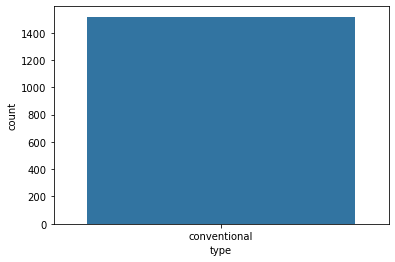

In [30]:
# checking counts of "type"

sns.countplot(x='type', data = df)
df["type"].value_counts()

we can visualize that there in only conventional type of Avacado present in our dataset.

It has unique value and contributing nothing to our analysis.

we will drop this feature name "type".

In [31]:
df = df.drop(columns=["type"])

2015    1270
2016     247
Name: year, dtype: int64

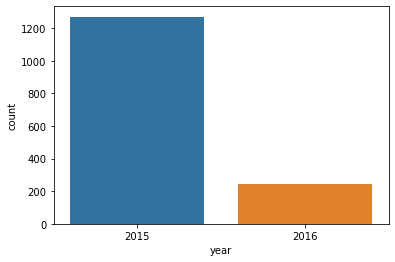

In [32]:
# checking counts of year

sns.countplot(x='year', data = df)
df["year"].value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: month, dtype: int64

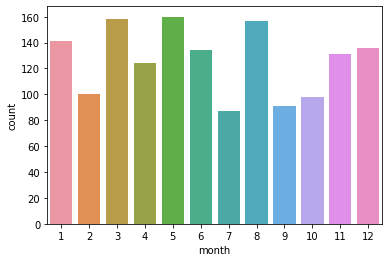

In [33]:
# checking counts of month

sns.countplot(x='month', data = df)
df["month"].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

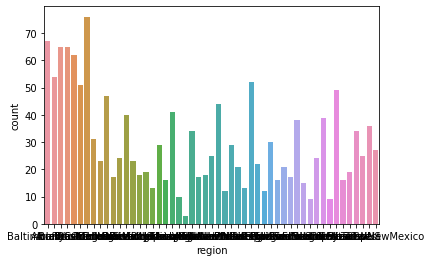

In [34]:
sns.countplot(x='region', data = df)
df["region"].value_counts()

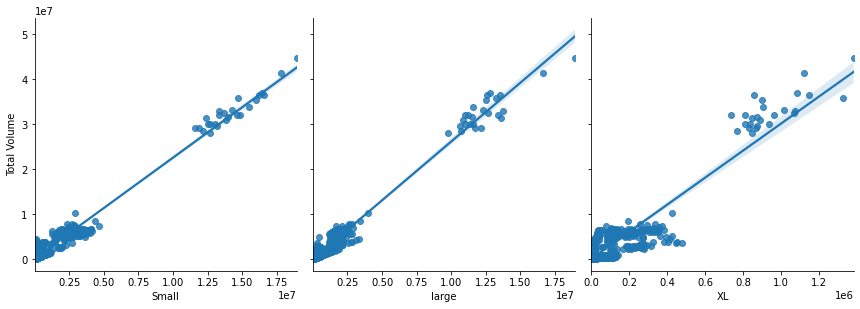

In [35]:
sns.pairplot(df, x_vars=['Small', 'large', 'XL'], y_vars='Total Volume', size=4, aspect=1, kind='reg')

we can see from our visualization that XL Avacados are sold maximum.

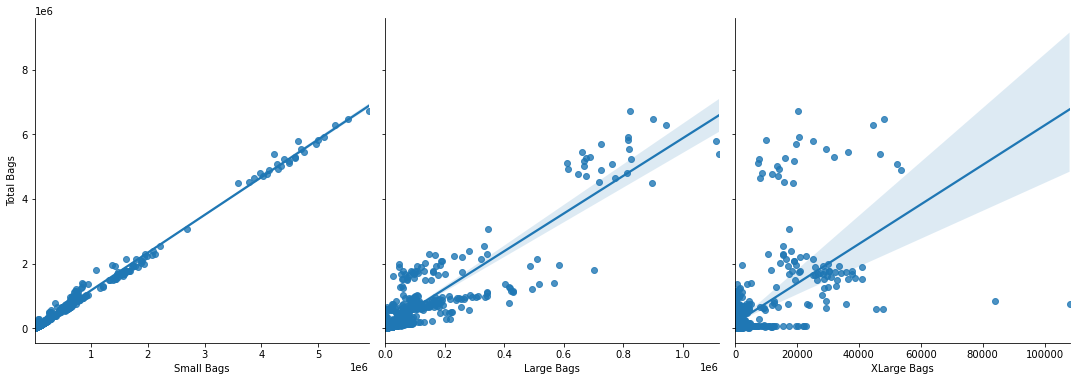

In [36]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

we can see from our visualization that XLarge Bags are sold maximum.

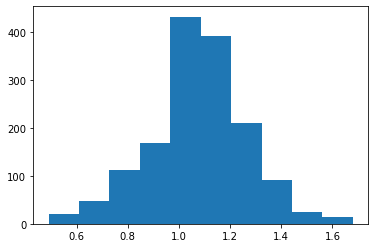

In [37]:
# visualizing our target variale.

plt.hist(df["AveragePrice"])
plt.show()

AveragePrice is distributed normally.

# FINDING CORRELATION

This data set has many different features and it is important to understand relationship between these in order to analyze dataset better which will help in our predictions of Average price of Avacados. For that reason, correlation map helps to understand these relations in a single representation. Correlation map is made by calculating the covariance of each features with respect to others, then each covariance value is divided by standard deviation of each variables and get results between -1, 0, 1.

-1 means: Shows negative relationship between dependent and independent variables .

0 means: Shows no relationship between dependent and independent variables .

1 means: Shows a positive relationship between dependent and independent variables .

In [38]:
corr= df.corr()
corr

,AveragePrice,Total Volume,Small,large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,year,day,month
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.092589,0.060642
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.034857,-0.055212
Small,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.031806,-0.053007
large,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.044008,-0.058429
XL,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.021318,-0.055079
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.021137,-0.047747
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.016462,-0.048978
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.046578,-0.039242
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.019315,0.021452
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,0.029744,-0.013144


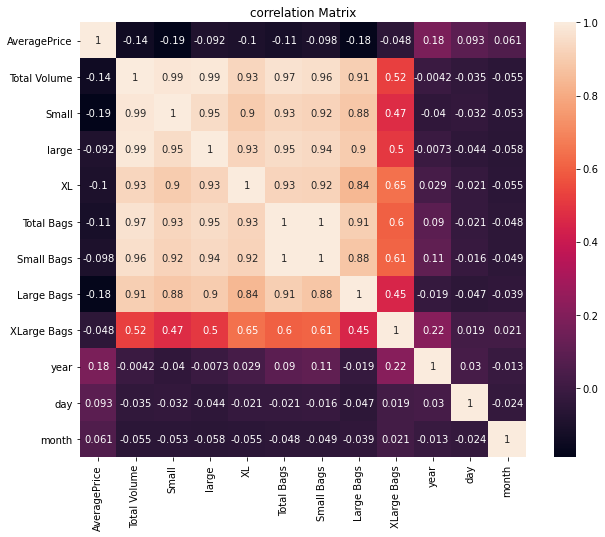

In [39]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [40]:
corr_matrix=df.corr()
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
day             0.092589
month           0.060642
XLarge Bags    -0.048284
large          -0.092084
Small Bags     -0.097682
XL             -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
Small          -0.190096
Name: AveragePrice, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

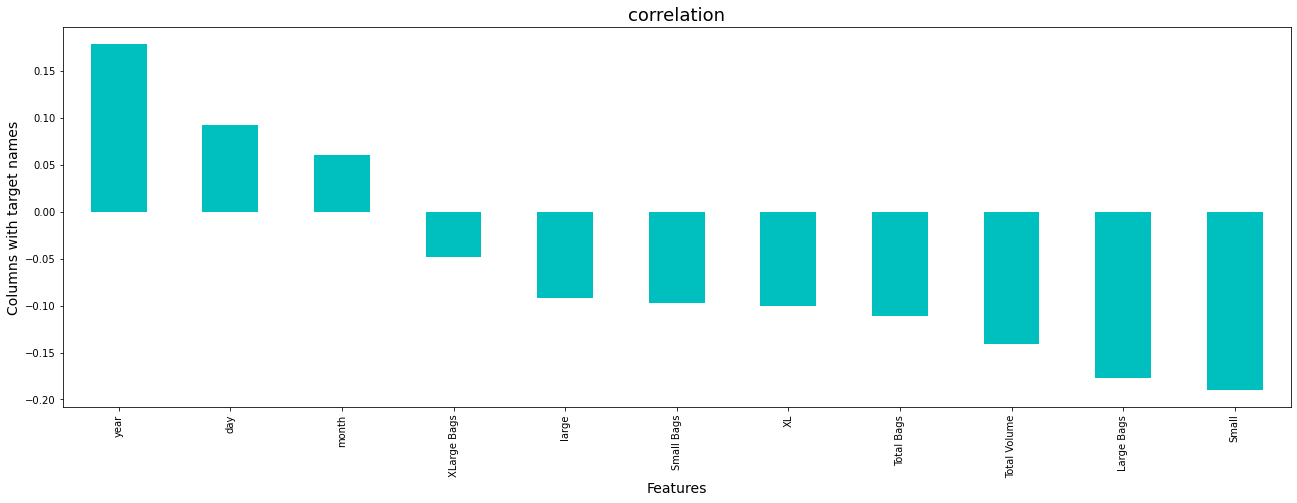

In [41]:
plt.figure(figsize=(22,7))
df.corr()["AveragePrice"].sort_values(ascending=False).drop(["AveragePrice"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

In [42]:
corr_matrix=df.corr()
corr_matrix["Total Bags"].sort_values(ascending=False)

Total Bags      1.000000
Small Bags      0.997341
Total Volume    0.967689
large           0.951779
Small           0.930395
XL              0.926405
Large Bags      0.911336
XLarge Bags     0.601856
year            0.090108
day            -0.021137
month          -0.047747
AveragePrice   -0.111597
Name: Total Bags, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

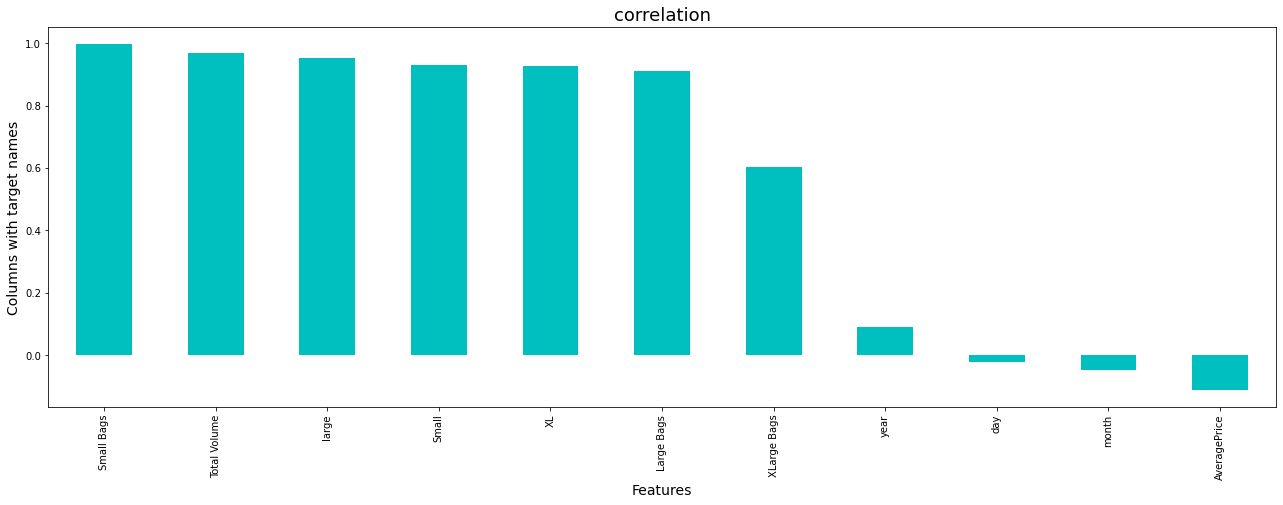

In [43]:
plt.figure(figsize=(22,7))
df.corr()["Total Bags"].sort_values(ascending=False).drop(["Total Bags"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

In [44]:
corr_matrix=df.corr()
corr_matrix["Total Volume"].sort_values(ascending=False)

Total Volume    1.000000
large           0.987154
Small           0.985568
Total Bags      0.967689
Small Bags      0.960642
XL              0.934347
Large Bags      0.910226
XLarge Bags     0.521717
year           -0.004189
day            -0.034857
month          -0.055212
AveragePrice   -0.140470
Name: Total Volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

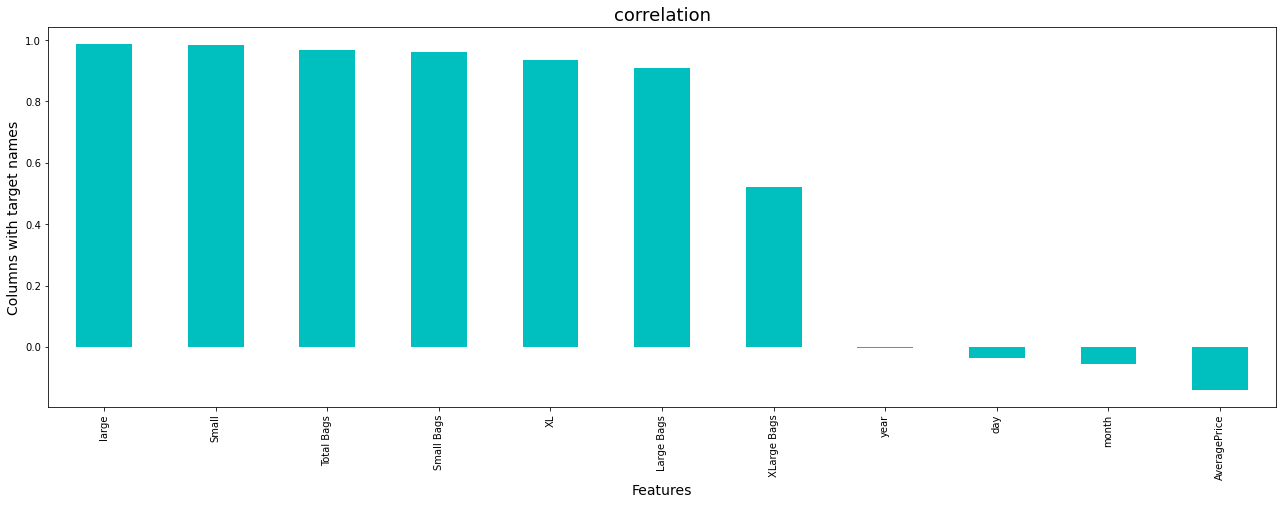

In [45]:
plt.figure(figsize=(22,7))
df.corr()["Total Volume"].sort_values(ascending=False).drop(["Total Volume"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

# LabelEncoding

we will convert categorical features into numerical.

"region" is in object form.

let's convert this into numeric.

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["region"] = le.fit_transform(df["region"])

In [47]:
df

,AveragePrice,Total Volume,Small,large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,16,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,10,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,10,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,25,9


# scaling

It helps to normalise the data within a particular range 0-1.

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [49]:
df

,AveragePrice,Total Volume,Small,large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
0,0.705882,0.000571,0.000030,0.002779,0.000035,0.000800,0.000898,0.000083,0.000000,0.0,0.00,0.866667,1.000000
1,0.722689,0.000361,0.000011,0.002261,0.000042,0.000920,0.001035,0.000087,0.000000,0.0,0.00,0.633333,1.000000
2,0.369748,0.001781,0.000017,0.005664,0.000094,0.000718,0.000803,0.000092,0.000000,0.0,0.00,0.400000,1.000000
3,0.495798,0.000902,0.000035,0.003703,0.000053,0.000371,0.000402,0.000119,0.000000,0.0,0.00,0.366667,0.454545
4,0.663866,0.000275,0.000025,0.002219,0.000055,0.000427,0.000454,0.000176,0.000000,0.0,0.00,0.933333,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0.756303,0.003409,0.003014,0.002880,0.012690,0.008333,0.007727,0.009236,0.002223,1.0,0.14,0.500000,0.818182
1513,0.857143,0.003126,0.002264,0.002659,0.014057,0.008910,0.008725,0.007668,0.000000,1.0,0.14,0.300000,0.727273
1514,0.831933,0.003130,0.002424,0.002696,0.012115,0.008778,0.008492,0.007366,0.007634,1.0,0.14,0.300000,0.090909
1515,0.823529,0.003371,0.002833,0.002733,0.012664,0.009003,0.008886,0.007384,0.000000,1.0,0.14,0.800000,0.727273


we can see that our whole data is in range 0-1.

# CHECKING OUTLIERS

In [50]:
df.dtypes

AveragePrice    float64
Total Volume    float64
Small           float64
large           float64
XL              float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region          float64
day             float64
month           float64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

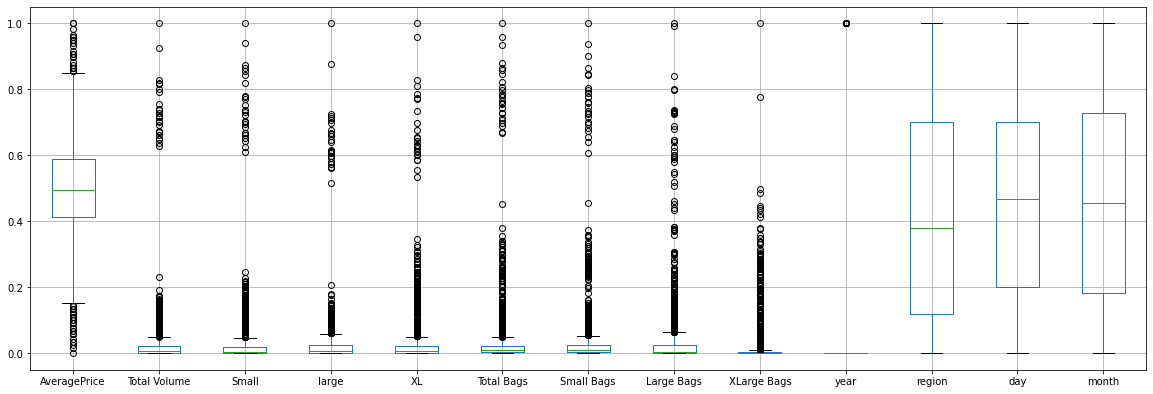

In [51]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

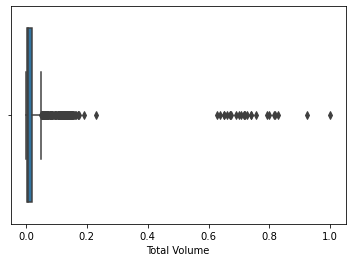

In [52]:
sns.boxplot(df["Total Volume"])

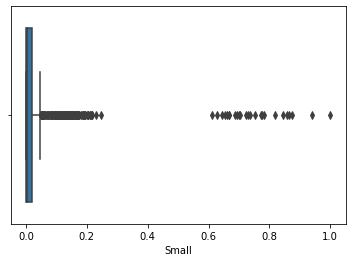

In [53]:
sns.boxplot(df["Small"])

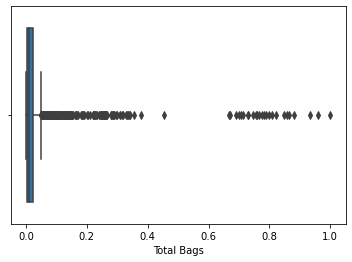

In [54]:
sns.boxplot(df["Total Bags"])

#### There are lot of outliers present in our dataset.

we will remove them by Zscore.

Z-score (standard score) gives us an idea of how far from the mean a data point is.More technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

The z score formula for a sample is:

z = (x – μ) / σ


In [55]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [56]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,AveragePrice,Total Volume,Small,large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
0,0.705882,0.000571,0.000030,0.002779,0.000035,0.000800,0.000898,0.000083,0.000000,0.0,0.00,0.866667,1.000000
1,0.722689,0.000361,0.000011,0.002261,0.000042,0.000920,0.001035,0.000087,0.000000,0.0,0.00,0.633333,1.000000
2,0.369748,0.001781,0.000017,0.005664,0.000094,0.000718,0.000803,0.000092,0.000000,0.0,0.00,0.400000,1.000000
3,0.495798,0.000902,0.000035,0.003703,0.000053,0.000371,0.000402,0.000119,0.000000,0.0,0.00,0.366667,0.454545
4,0.663866,0.000275,0.000025,0.002219,0.000055,0.000427,0.000454,0.000176,0.000000,0.0,0.00,0.933333,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0.756303,0.003409,0.003014,0.002880,0.012690,0.008333,0.007727,0.009236,0.002223,1.0,0.14,0.500000,0.818182
1513,0.857143,0.003126,0.002264,0.002659,0.014057,0.008910,0.008725,0.007668,0.000000,1.0,0.14,0.300000,0.727273
1514,0.831933,0.003130,0.002424,0.002696,0.012115,0.008778,0.008492,0.007366,0.007634,1.0,0.14,0.300000,0.090909
1515,0.823529,0.003371,0.002833,0.002733,0.012664,0.009003,0.008886,0.007384,0.000000,1.0,0.14,0.800000,0.727273


In [57]:
df_new_z.shape

(1436, 13)

In [58]:
df.shape

(1517, 13)

### checking data loss:

In [59]:
Data_loss=((1517-1436)/1517)*100

In [60]:
Data_loss

5.339485827290705

### we are lossing around 5% data.

we will continue with new data as our model is not becoming biased.

# Checking Skweness


If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed.



In [62]:
df_new_z.skew()

AveragePrice   -0.184770
Total Volume    2.704085
Small           3.120756
large           2.367429
XL              3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
day             0.041849
month           0.111898
dtype: float64

we can see there is skewness present in "Total Volume", "Small", "large", "XL", "Total Bags", "Small Bags", "large bags", "XL Bags".

we will remove skewness through power_transform

In [63]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df_new_z)

df_new=pd.DataFrame(df_new,columns=df.columns)

In [64]:
df_new.skew()

AveragePrice    0.020846
Total Volume    0.798452
Small           1.041485
large           0.748199
XL              0.961392
Total Bags      0.823963
Small Bags      0.824021
Large Bags      0.936477
XLarge Bags     1.617547
year            2.004439
region          0.025746
day            -0.051972
month          -0.036876
dtype: float64

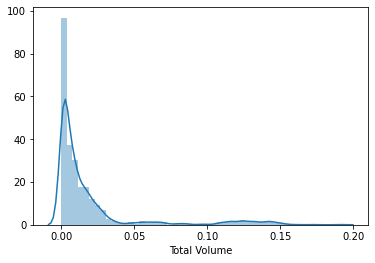

In [65]:
sns.distplot(df_new_z["Total Volume"])

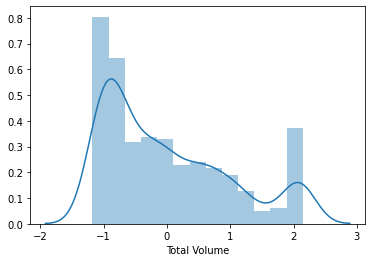

In [66]:
sns.distplot(df_new["Total Volume"])

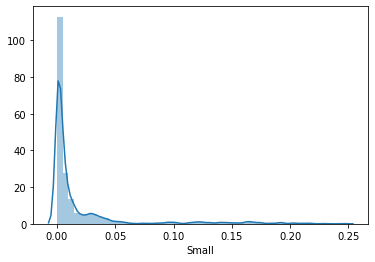

In [67]:
sns.distplot(df_new_z["Small"])

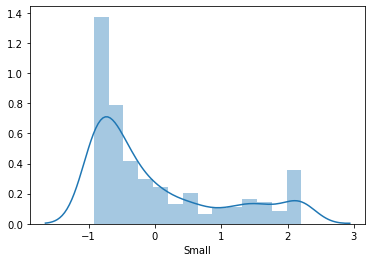

In [68]:
sns.distplot(df_new["Small"])

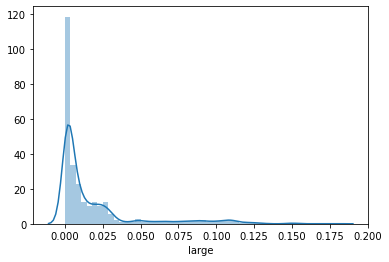

In [69]:
sns.distplot(df_new_z["large"])

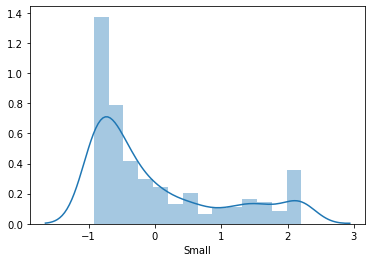

In [70]:
sns.distplot(df_new["Small"])

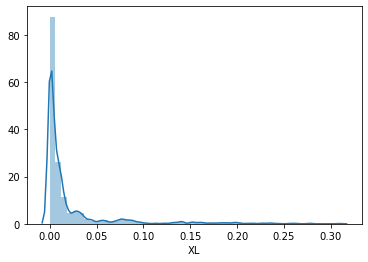

In [71]:
sns.distplot(df_new_z["XL"])

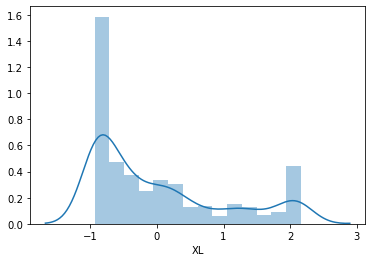

In [72]:
sns.distplot(df_new["XL"])

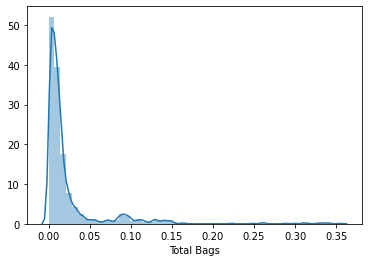

In [73]:
sns.distplot(df_new_z["Total Bags"])

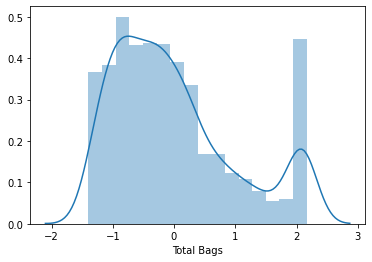

In [74]:
sns.distplot(df_new["Total Bags"])

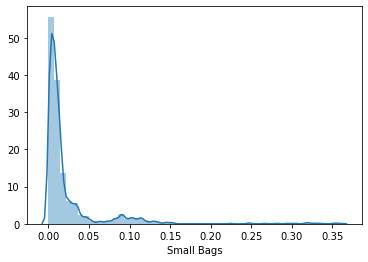

In [75]:
sns.distplot(df_new_z["Small Bags"])

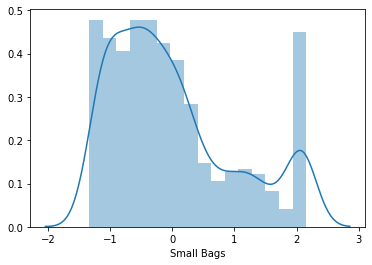

In [76]:
sns.distplot(df_new["Small Bags"])

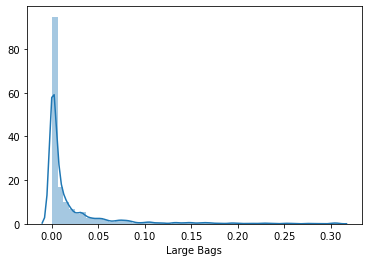

In [77]:
sns.distplot(df_new_z["Large Bags"])

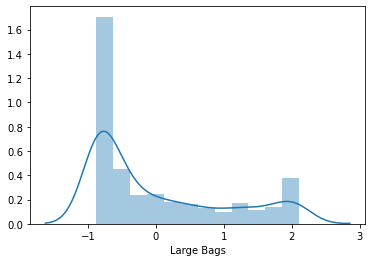

In [79]:
sns.distplot(df_new["Large Bags"])

#### After running power_transform we can clearly see that data is normally distributed and no skewness is present.

# Splitting the data into X & Y

x-----> INDEPENDENT VARIABLE

y-----> DEPENDENT VARIABLE

In [80]:
x= df_new.drop("AveragePrice",axis=1)     # independent variable
y= df_new["AveragePrice"]                # dependent variable

In [81]:
x.columns

Index(['Total Volume', 'Small', 'large', 'XL', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'region', 'day', 'month'],
      dtype='object')

# FINDING BEST RANDOM STATE

In [83]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.49941100885125633 on Random_state 73


### Linear Regression

In [84]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=73)
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.49941100885125633


### Ensemble Technique

### Cross Validation Score

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

rf= RandomForestRegressor(random_state=73)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score                : ",r2_score(y_test,predrf))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,predrf)))

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestRegressor model:", scr.mean())

R2 Score                :  0.8181797079160077
Root Mean Squared Error :  0.45000418457780145
cross validation score of RandomForestRegressor model: 0.13633739062064545


### AdaBoostRegressor

In [95]:
from sklearn.ensemble import AdaBoostRegressor

ad= AdaBoostRegressor(random_state=73)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("R2 Score                : ",r2_score(y_test,predad))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,predad)))

scr=cross_val_score(ad,x,y,cv=5)
print("cross validation score of AdaBoostRegressor model:", scr.mean())

R2 Score                :  0.6501119144414726
Root Mean Squared Error :  0.6242520163031114
cross validation score of AdaBoostRegressor model: 0.21940097755460802


### DecisionTreeRegressor

In [96]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor(random_state=73)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("R2 Score                : ",r2_score(y_test,preddt))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,preddt)))

scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of DecisionTreeRegressor model:", scr.mean())


R2 Score                :  0.6227354706880643
Root Mean Squared Error :  0.6482139363422994
cross validation score of DecisionTreeRegressor model: -0.5704432565787165


### SVR


In [98]:
from sklearn.svm import SVR

svr= SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
print("R2 Score                : ",r2_score(y_test,pred_y))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_y)))

scr=cross_val_score(svr,x,y,cv=5)
print("cross validation score of SVR model:", scr.mean())


R2 Score                :  0.6642494930873972
Root Mean Squared Error :  0.6115102137762822
cross validation score of SVR model: 0.25664328824435206


##### The minimum differnence bwtween r2_score and cross validation score is with SupportVectorRegressor.

Therefore, we will continue our predictions only with SVR.

In [100]:
# importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [102]:
from sklearn import svm, datasets

parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}

svr = svm.SVR()
GCV=GridSearchCV(svr, parameters, cv=5)
GCV.fit(x_train, y_train)
GCV.best_params_

{'C': 10, 'kernel': 'rbf'}

In [103]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [104]:
r2_score(y_test,GCV_pred)

0.771718556036388

In [113]:
svr= SVR(kernel="rbf", C=10)
svr.fit(x_train,y_train)

SVR(C=10)

# SAVE THE MODEL:

In [114]:
import pickle
filename= "AvacadoPrice.pkl"
pickle.dump(svr,open(filename,"wb"))

# LOAD THE MODEL:

In [115]:
loaded_model=pickle.load(open("AvacadoPrice.pkl","rb"))

result= loaded_model.score(x_test,y_test)
print(result)

0.771718556036388


# RESULTS:

In [116]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["predicted","original"])

In [117]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
predicted,0.844421,-0.160361,-2.090005,-0.533319,0.330226,-0.86915,0.3788,-0.509728,-0.19255,0.259887,...,0.192449,-0.226661,-0.343159,-1.373365,0.947969,-1.317967,-0.440953,0.315883,1.180736,0.274908
original,0.844421,-0.160361,-2.090005,-0.533319,0.330226,-0.86915,0.3788,-0.509728,-0.19255,0.259887,...,0.192449,-0.226661,-0.343159,-1.373365,0.947969,-1.317967,-0.440953,0.315883,1.180736,0.274908


### we achieved 77% accuracy with our model, it is quiet good accuracy score we have achieved with our model. 